# Financial Markets

Coursera, Yale.
Prof. Robert Shiller.

## Lesson 1

- A lot of money can be done in finance, some use it for good, other for bad
- Carnegie, wealthy businessman, said you need to retire early if you get rich and become a philanthropist

# Lesson 2

### Value at Risk = VAR: Risk measurement metric
- Coined after the crash in 1987
- Risk of a portfolio
- 1% one-year VaR of 10 million = 1% chance that portfolio will lose 10 million in a year

### Stress Tests: another risk measurement metric
- Popular after the 2008 crash
- Method of assessing risk of firms or portfolios
- Details and vulnerabilities are observed, and evaluated as if a crisis would come - would the company stand a crisis?
- At least 3 different economic scenarios are considered for the stress
- USA, EU, UK, China, all do that
- Do they work? There are some critics - basically, they say they lack of imagination of what could happen, so they underestimate the problems
- Usually it’s an issue making public bad results of stress tests, because other businesses won’t want to make business with you

### SP500 Stock index: average of 500 stocks
- Crashes: 2000, 2008
- Quite unstable in period 2000-2016
- Truth is: very difficult to predict
- Apple stock superimposed: Apple was much better than SP500!
    - However, when returns plotted, we see there’s a lot of noise
    - Apple goes up and down so much from month to month, sometimes 60%!
- Scatterplot: returns Apple vs SP500: they seem to be correlated
    - Apple is more variable
    - Slope (beta): 1.45 -> Apple overreacts to SP500
    - Beta of the stock: slope of the stock model against the aggregate market value
- NOTE: in economy/finance, regression is modeled as: y = beta*x + alpha
    - X: return of the market (eg, SP500)
    - Y: return of a stock (eg, Apple)

In [25]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2016, 12, 31)

In [7]:
SP500 = data.DataReader("^GSPC", 'yahoo', start, end)
APPLE = data.DataReader("AAPL", 'yahoo', start, end)

In [9]:
SP500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [11]:
APPLE.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.862169
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.789480
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.801032
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.731712
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.766373


In [14]:
tickers = ['SP500', 'APPLE']
stocks = pd.concat([SP500, APPLE], axis=1, keys=tickers)
stocks.columns.names = ['Name/Ticker','Stock Info']

In [16]:
stocks.xs(key='Close',axis=1,level='Stock Info').max()

Name/Ticker
SP500    2271.719971
APPLE      33.250000
dtype: float64

In [19]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = stocks[tick]['Close'].pct_change()
# The return percent of the first day is NaN
returns.head()

,SP500 Return,APPLE Return
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.038345,-0.084310
2000-01-05,0.001922,0.014633
2000-01-06,0.000956,-0.086538
2000-01-07,0.027090,0.047369


<Figure size 720x720 with 0 Axes>

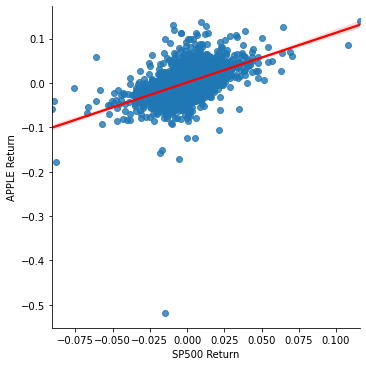

In [49]:
# Plot everything which is not NaN
plt.figure(figsize=(10,10))
#sns.scatterplot(data=returns,x='SP500 Return',y='APPLE Return')
sns.lmplot(data=returns.dropna(),x='SP500 Return',y='APPLE Return',line_kws={'color': 'red'})

In [30]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [44]:
lm.fit(returns[['SP500 Return']].dropna(),returns[['APPLE Return']].dropna())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print('Intercept (Alpha): ', lm.intercept_)
print('Slope (Beta): ', lm.coef_)

Intercept (Alpha):  [0.00096402]
Slope (Beta):  [[1.1207916]]


<AxesSubplot:xlabel='SP500 Return', ylabel='Count'>

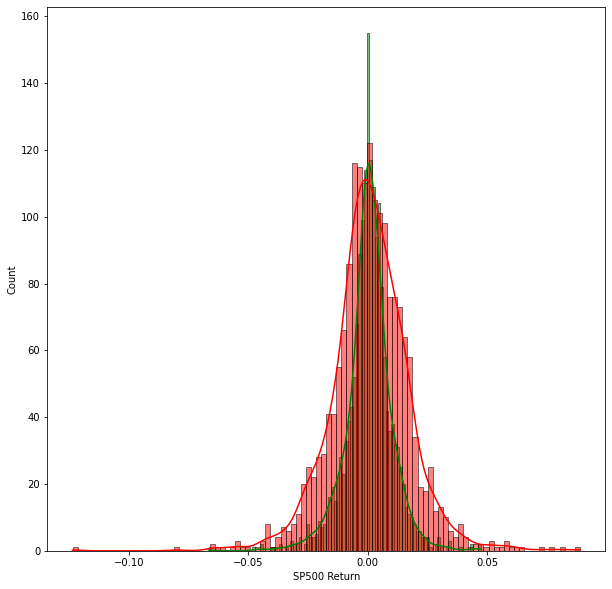

In [55]:
# Histrogram of returns in a time period
plt.figure(figsize=(10,10))
sns.histplot(returns.loc['2010-01-01':'2016-12-31']['SP500 Return'],
             color='green',
             bins=100,
             kde=True)
sns.histplot(returns.loc['2010-01-01':'2016-12-31']['APPLE Return'],
             color='red',
             bins=100,
             kde=True)

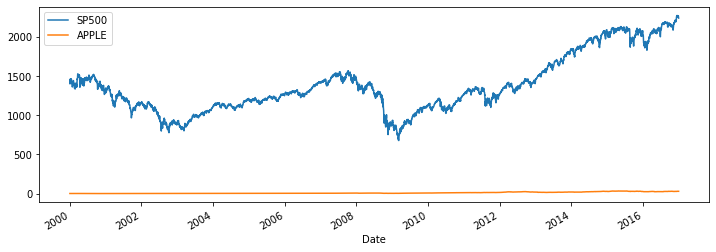

In [57]:
for tick in tickers:
    stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

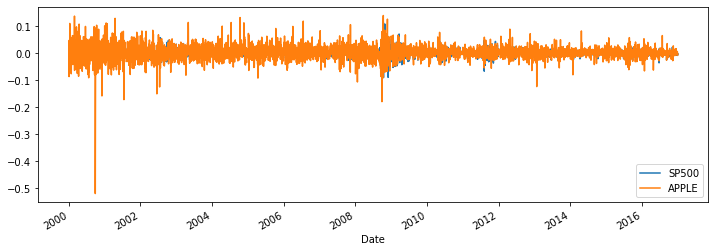

In [61]:
returns['SP500 Return'].plot(figsize=(12,4),label=tickers[0])
returns['APPLE Return'].plot(figsize=(12,4),label=tickers[1])
plt.legend()

### Market risk vs idiosyncratic risk
- Market risk: systematic risk, events or conditions that affect to everybody
- Idiosyncratic risk: death of Steve Jobs